In [29]:
!pip install ../input/python-datatable/datatable-0.11.0-cp37-cp37m-manylinux2010_x86_64.whl > /dev/null 2>&1
import datatable as dt

# system
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout, Concatenate, Lambda, GaussianNoise, Activation
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers.experimental.preprocessing import Normalization
import keras.backend as K
import tensorflow as tf
from tensorflow import keras

import numpy as np
from scipy.stats import norm
import pandas as pd
pd.set_option('display.max_columns', 500)

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PowerTransformer,QuantileTransformer,normalize,MaxAbsScaler
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score
from sklearn.utils import class_weight

from tqdm import tqdm
import gc

import janestreet

In [30]:
# Options
Display = False
Inf = False
TRAINING = True

# seed set
SEED = 2021
tf.random.set_seed(SEED)
np.random.seed(SEED)

## Reading

In [31]:
folder_path = '../input/jane-street-market-prediction/'
save_path = '../input/jane-autoencorder/'

In [32]:
# Reading csv
print('Reading train.csv')
train = dt.fread(folder_path + 'train.csv').to_pandas()

print('Finish Reading')

Reading train.csv
Finish Reading


## Feature Enginiering

In [33]:
def feature_enginering(df,feature):
    
    df['feature_201'] = (df['feature_1']**2).astype('float32')
    df['feature_202'] = (df['feature_2']**2).astype('float32')
    df['feature_203'] = (df['feature_3']**2).astype('float32')
    df['feature_204'] = (df['feature_4']**2).astype('float32')
    df['feature_205'] = (df['feature_5']**2).astype('float32')
    df['feature_206'] = (df['feature_6']**2).astype('float32')
    df['feature_207'] = (df['feature_7']**2).astype('float32')
    df['feature_208'] = (df['feature_8']**2).astype('float32')
    df['feature_209'] = (df['feature_9']**2).astype('float32')
    df['feature_210'] = (df['feature_10']**2).astype('float32')
    
    df['feature_211'] = (df['feature_11']**2).astype('float32')
    df['feature_212'] = (df['feature_12']**2).astype('float32')
    df['feature_213'] = (df['feature_13']**2).astype('float32')
    df['feature_214'] = (df['feature_14']**2).astype('float32')
    df['feature_215'] = (df['feature_15']**2).astype('float32')
    df['feature_216'] = (df['feature_16']**2).astype('float32')
    df['feature_217'] = (df['feature_17']**2).astype('float32')
    df['feature_218'] = (df['feature_18']**2).astype('float32')
    df['feature_219'] = (df['feature_19']**2).astype('float32')
    df['feature_220'] = (df['feature_20']**2).astype('float32')
    
    df['feature_221'] = (df['feature_21']**2).astype('float32')
    df['feature_222'] = (df['feature_22']**2).astype('float32')
    df['feature_223'] = (df['feature_23']**2).astype('float32')
    df['feature_224'] = (df['feature_24']**2).astype('float32')
    df['feature_225'] = (df['feature_25']**2).astype('float32')
    df['feature_226'] = (df['feature_26']**2).astype('float32')
    df['feature_227'] = (df['feature_27']**2).astype('float32')
    df['feature_228'] = (df['feature_28']**2).astype('float32')
    df['feature_229'] = (df['feature_29']**2).astype('float32')
    df['feature_230'] = (df['feature_30']**2).astype('float32')

    df['feature_231'] = (df['feature_31']**2).astype('float32')
    df['feature_232'] = (df['feature_32']**2).astype('float32')
    df['feature_233'] = (df['feature_33']**2).astype('float32')
    df['feature_234'] = (df['feature_34']**2).astype('float32')
    df['feature_235'] = (df['feature_35']**2).astype('float32')
    df['feature_236'] = (df['feature_36']**2).astype('float32')
    df['feature_237'] = (df['feature_37']**2).astype('float32')
    df['feature_238'] = (df['feature_38']**2).astype('float32')
    df['feature_239'] = (df['feature_39']**2).astype('float32')
    df['feature_240'] = (df['feature_40']**2).astype('float32')
    
    df['feature_241'] = (df['feature_41']**2).astype('float32')
    df['feature_242'] = (df['feature_42']**2).astype('float32')
    df['feature_243'] = (df['feature_43']**2).astype('float32')
    df['feature_244'] = (df['feature_44']**2).astype('float32')
    df['feature_245'] = (df['feature_45']**2).astype('float32')
    df['feature_246'] = (df['feature_46']**2).astype('float32')
    df['feature_247'] = (df['feature_47']**2).astype('float32')
    df['feature_248'] = (df['feature_48']**2).astype('float32')
    df['feature_249'] = (df['feature_49']**2).astype('float32')
    df['feature_250'] = (df['feature_50']**2).astype('float32')
    
    df['feature_251'] = (df['feature_51']**2).astype('float32')
    df['feature_252'] = (df['feature_52']**2).astype('float32')
    df['feature_253'] = (df['feature_53']**2).astype('float32')
    df['feature_254'] = (df['feature_54']**2).astype('float32')
    df['feature_255'] = (df['feature_55']**2).astype('float32')
    df['feature_256'] = (df['feature_56']**2).astype('float32')
    df['feature_257'] = (df['feature_57']**2).astype('float32')
    df['feature_258'] = (df['feature_58']**2).astype('float32')
    df['feature_259'] = (df['feature_59']**2).astype('float32')
    df['feature_260'] = (df['feature_60']**2).astype('float32')
    
    df['feature_261'] = (df['feature_61']**2).astype('float32')
    df['feature_262'] = (df['feature_62']**2).astype('float32')
    df['feature_263'] = (df['feature_63']**2).astype('float32')
    df['feature_264'] = (df['feature_64']**2).astype('float32')
    df['feature_265'] = (df['feature_65']**2).astype('float32')
    df['feature_266'] = (df['feature_66']**2).astype('float32')
    df['feature_267'] = (df['feature_67']**2).astype('float32')
    df['feature_268'] = (df['feature_68']**2).astype('float32')
    df['feature_269'] = (df['feature_69']**2).astype('float32')
    df['feature_270'] = (df['feature_70']**2).astype('float32')
    
    df['feature_271'] = (df['feature_71']**2).astype('float32')
    df['feature_272'] = (df['feature_72']**2).astype('float32')
    df['feature_273'] = (df['feature_73']**2).astype('float32')
    df['feature_274'] = (df['feature_74']**2).astype('float32')
    df['feature_275'] = (df['feature_75']**2).astype('float32')
    df['feature_276'] = (df['feature_76']**2).astype('float32')
    df['feature_277'] = (df['feature_77']**2).astype('float32')
    df['feature_278'] = (df['feature_78']**2).astype('float32')
    df['feature_279'] = (df['feature_79']**2).astype('float32')
    df['feature_280'] = (df['feature_80']**2).astype('float32')
    
    df['feature_281'] = (df['feature_81']**2).astype('float32')
    df['feature_282'] = (df['feature_82']**2).astype('float32')
    df['feature_283'] = (df['feature_83']**2).astype('float32')
    df['feature_284'] = (df['feature_84']**2).astype('float32')
    df['feature_285'] = (df['feature_85']**2).astype('float32')
    df['feature_286'] = (df['feature_86']**2).astype('float32')
    df['feature_287'] = (df['feature_87']**2).astype('float32')
    df['feature_288'] = (df['feature_88']**2).astype('float32')
    df['feature_289'] = (df['feature_89']**2).astype('float32')
    df['feature_290'] = (df['feature_90']**2).astype('float32')
    
    df['feature_291'] = (df['feature_91']**2).astype('float32')
    df['feature_292'] = (df['feature_92']**2).astype('float32')
    df['feature_293'] = (df['feature_93']**2).astype('float32')
    df['feature_294'] = (df['feature_94']**2).astype('float32')
    df['feature_295'] = (df['feature_95']**2).astype('float32')
    df['feature_296'] = (df['feature_96']**2).astype('float32')
    df['feature_297'] = (df['feature_97']**2).astype('float32')
    df['feature_298'] = (df['feature_98']**2).astype('float32')
    df['feature_299'] = (df['feature_99']**2).astype('float32')
    df['feature_300'] = (df['feature_100']**2).astype('float32')
    
    df['feature_301'] = (df['feature_101']**2).astype('float32')
    df['feature_302'] = (df['feature_102']**2).astype('float32')
    df['feature_303'] = (df['feature_103']**2).astype('float32')
    df['feature_304'] = (df['feature_104']**2).astype('float32')
    df['feature_305'] = (df['feature_105']**2).astype('float32')
    df['feature_306'] = (df['feature_106']**2).astype('float32')
    df['feature_307'] = (df['feature_107']**2).astype('float32')
    df['feature_308'] = (df['feature_108']**2).astype('float32')
    df['feature_309'] = (df['feature_109']**2).astype('float32')
    df['feature_310'] = (df['feature_110']**2).astype('float32')
    
    df['feature_311'] = (df['feature_111']**2).astype('float32')
    df['feature_312'] = (df['feature_112']**2).astype('float32')
    df['feature_313'] = (df['feature_113']**2).astype('float32')
    df['feature_314'] = (df['feature_114']**2).astype('float32')
    df['feature_315'] = (df['feature_115']**2).astype('float32')
    df['feature_316'] = (df['feature_116']**2).astype('float32')
    df['feature_317'] = (df['feature_117']**2).astype('float32')
    df['feature_318'] = (df['feature_118']**2).astype('float32')
    df['feature_319'] = (df['feature_119']**2).astype('float32')
    df['feature_320'] = (df['feature_120']**2).astype('float32')
    
    df['feature_321'] = (df['feature_121']**2).astype('float32')
    df['feature_322'] = (df['feature_122']**2).astype('float32')
    df['feature_323'] = (df['feature_123']**2).astype('float32')
    df['feature_324'] = (df['feature_124']**2).astype('float32')
    df['feature_325'] = (df['feature_125']**2).astype('float32')
    df['feature_326'] = (df['feature_126']**2).astype('float32')
    df['feature_327'] = (df['feature_127']**2).astype('float32')
    df['feature_328'] = (df['feature_128']**2).astype('float32')
    df['feature_329'] = (df['feature_129']**2).astype('float32')
    
    return df

## Pre-processing

In [34]:
# Pre-process
print('Pre-process start')
train = train.astype({c: np.float32 for c in train.select_dtypes(include='float64').columns}) #limit memory use
train = train[train['weight'] > 0.0]
#train = train[train['date'] < 5].reset_index(drop=True)

Pre-process start


In [35]:
#train['week'] = train['date']%5
#train['week'].value_counts()

In [36]:
#train = train[train['week'] == 0]

In [37]:
pre_features = [c for c in train.columns if "feature" in c]

In [38]:
#train[features] = (train[features]>0.0).astype('int8')

In [39]:
#train[features] = train[features].apply(np.log1p)

In [40]:
f_mean = np.mean(train[pre_features[1:]].values,axis=0)

train.fillna(train.mean(),inplace=True)

In [41]:
p05 = train[pre_features].quantile(0.05)
p95 = train[pre_features].quantile(0.95)

train[pre_features] = train[pre_features].clip(p05,p95,axis=1)

In [42]:
#qt = QuantileTransformer(n_quantiles=100,random_state=SEED,output_distribution='normal')
#qt = MaxAbsScaler()
#qt.fit(train[pre_features])

#train[pre_features] = qt.transform(train[pre_features])
#train[pre_features] = normalize(train[pre_features],axis=0)

In [43]:
#pt = PowerTransformer(method='yeo-johnson')
#train[pre_features]=pt.fit_transform(train[pre_features])

In [44]:
# action = 0とするresp(=featureのリターン)を学習させるターゲットとする
train['action'] = (train['resp']> 0.0).astype('int8')
train['action_1'] = ((train['resp']> 0.0)&(train['resp_1']> 0.0)).astype('int8')
train['action_2'] = ((train['resp']> 0.0)&(train['resp_2']> 0.0)).astype('int8')
train['action_3'] = ((train['resp']> 0.0)&(train['resp_3']> 0.0)).astype('int8')
train['action_4'] = ((train['resp']> 0.0)&(train['resp_4']> 0.0)).astype('int8')
train['action_5'] = ((train['resp']> 0.0)&(train['resp_1']> 0.0)&(train['resp_2']> 0.0)).astype('int8')
train['action_6'] = ((train['resp']> 0.0)&(train['resp_1']> 0.0)&(train['resp_3']> 0.0)).astype('int8')
train['action_7'] = ((train['resp']> 0.0)&(train['resp_1']> 0.0)&(train['resp_4']> 0.0)).astype('int8')
train['action_8'] = ((train['resp']> 0.0)&(train['resp_2']> 0.0)&(train['resp_3']> 0.0)).astype('int8')
train['action_9'] = ((train['resp']> 0.0)&(train['resp_2']> 0.0)&(train['resp_4']> 0.0)).astype('int8')
train['action_10'] = ((train['resp']> 0.0)&(train['resp_3']> 0.0)&(train['resp_4']> 0.0)).astype('int8')
train['action_11'] = ((train['resp']> 0.0)&(train['resp_1']> 0.0)&(train['resp_2']> 0.0)&(train['resp_3']> 0.0)).astype('int8')
train['action_12'] = ((train['resp']> 0.0)&(train['resp_1']> 0.0)&(train['resp_2']> 0.0)&(train['resp_4']> 0.0)).astype('int8')
train['action_13'] = ((train['resp']> 0.0)&(train['resp_1']> 0.0)&(train['resp_3']> 0.0)&(train['resp_4']> 0.0)).astype('int8')
train['action_14'] = ((train['resp']> 0.0)&(train['resp_2']> 0.0)&(train['resp_3']> 0.0)&(train['resp_4']> 0.0)).astype('int8')
train['action_15'] = ((train['resp']> 0.0)&(train['resp_1']> 0.0)&(train['resp_2']> 0.0)&(train['resp_3']> 0.0)&(train['resp_4']> 0.0)).astype('int8')

# features
#train = feature_enginering(train,pre_features)

select_feature = False # True
if select_feature:
    # lgbm_feature_importance_top...
    numbers = [18]

    features = [c for c in train.columns if "feature" in c if int(c.split('_')[-1]) in numbers]
else:
    features = [c for c in train.columns if "feature" in c]

#target = 'action'
multi_target = ['action']
#multi_target = ['action','action_1','action_2','action_3','action_4']
#multi_target = ['resp','resp_1','resp_2','resp_3','resp_4']
#multi_target = [c for c in train.columns if "action" in c]

In [45]:
# Display
if Display:
    print('desccribe')
    display(train.describe())
    print(train.dtypes)

## Metric

In [46]:
def utility_score_numba(date, weight, resp, action):
    Pi = np.bincount(date, weight * resp * action)
    t = np.sum(Pi) / np.sqrt(np.sum(Pi ** 2)) * np.sqrt(250 / len(Pi))
    u = min(max(t, 0), 6) * np.sum(Pi)
    return u

def jane_utility(data, action_column="action"):
    return utility_score_numba(data["date"].values, data["weight"].values, data["resp"].values, data[action_column].values)

## Model

In [47]:
class WeightedBinaryCrossEntropy(keras.losses.Loss):
    """
    Args:
      pos_weight: Scalar to affect the positive labels of the loss function.
      weight: Scalar to affect the entirety of the loss function.
      from_logits: Whether to compute loss form logits or the probability.
      reduction: Type of tf.keras.losses.Reduction to apply to loss.
      name: Name of the loss function.
    """
    def __init__(self, pos_weight, weight, from_logits=False,
                 reduction=keras.losses.Reduction.AUTO,
                 name='weighted_binary_crossentropy'):
        super(WeightedBinaryCrossEntropy, self).__init__(reduction=reduction,
                                                         name=name)
        self.pos_weight = pos_weight
        self.weight = weight
        self.from_logits = from_logits
 
    def call(self, y_true, y_pred):
        if not self.from_logits:
            # Manually calculate the weighted cross entropy.
            # Formula is qz * -log(sigmoid(x)) + (1 - z) * -log(1 - sigmoid(x))
            # where z are labels, x is logits, and q is the weight.
            # Since the values passed are from sigmoid (assuming in this case)
            # sigmoid(x) will be replaced by y_pred
 
            # qz * -log(sigmoid(x)) 1e-6 is added as an epsilon to stop passing a zero into the log
            x_1 = y_true * self.pos_weight * -tf.math.log(y_pred + 1e-6)
 
            # (1 - z) * -log(1 - sigmoid(x)). Epsilon is added to prevent passing a zero into the log
            x_2 = (1 - y_true) * -tf.math.log(1 - y_pred + 1e-6)
 
            return tf.add(x_1, x_2) * self.weight
 
        # Use built in function
        return tf.nn.weighted_cross_entropy_with_logits(y_true, y_pred, self.pos_weight) * self.weight

In [48]:
def create_mlp(input_dim, output_dim, label_smoothing, learning_rate):

    inputs = Input(input_dim)
    
    x = BatchNormalization()(inputs)
    x = tf.keras.layers.Dropout(0.2)(x)
    
    x = tf.keras.layers.Dense(160)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation(tf.keras.activations.swish)(x)
    x = tf.keras.layers.Dropout(0.2)(x)

    x = tf.keras.layers.Dense(160)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation(tf.keras.activations.swish)(x)
    x = tf.keras.layers.Dropout(0.2)(x)

    out = Dense(output_dim, activation='sigmoid')(x)
    #out = Dense(output_dim)(x)
   
    model = Model(inputs=inputs, outputs=out)
    
    model.compile(
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate),
        #loss= WeightedBinaryCrossEntropy(0.9, 1.0),
        #loss = tf.keras.losses.BinaryCrossentropy(label_smoothing=label_smoothing),
        loss = tf.keras.losses.BinaryCrossentropy(),
        #loss = tf.keras.losses.MeanAbsoluteError(),
        metrics = tf.keras.metrics.AUC(name="AUC"),
        #metrics = tf.keras.metrics.MeanAbsoluteError()
    )

    return model

# Traning,Validation

In [49]:
epochs = 1000
batch_size = 4096
label_smoothing = 0.01
learning_rate = 0.001

opt_th = 0.400
#opt_th = 0.000

models = []

if TRAINING:
    date = train['date'].unique()

    kf = KFold(n_splits=5, random_state=SEED, shuffle=False)
    for k, (train_date, valid_date) in enumerate(kf.split(date)):
        train_date, valid_date = date[train_date], date[valid_date]
        
        index_train, index_valid = train['date'].isin(train_date), train['date'].isin(valid_date)
    
        X_train, X_valid = train.loc[index_train,features].values, train.loc[index_valid,features].values
        y_train, y_valid = train.loc[index_train,multi_target].values.astype('float32'), train.loc[index_valid,multi_target].values.astype('float32')
        
        print('Fold_{}'.format(k))
        print('=============================================================================')
        print('X_train:',X_train.shape)
        print('y_train:',y_train.shape)
        print('X_valid:',X_valid.shape)
        print('y_valid:',y_valid.shape)
        
        #class_weights = {0: 1.,1: 1.1}
        nn_model = create_mlp(len(features), len(multi_target), label_smoothing, learning_rate)

        nn_model.fit(X_train,
                     y_train,
                     #class_weight=class_weights,
                     epochs=epochs,
                     validation_data=(X_valid,y_valid),
                     batch_size=batch_size,
                     callbacks=[EarlyStopping('val_loss',patience=2,restore_best_weights=True)]
                    )
        # restore model
        models.append(nn_model)
        
        # save model
        nn_model.save_weights('./model_fold{}.hdf5'.format(k))
        
        # validation
        Valid = train[index_valid]

        predictions = np.zeros(X_valid.shape[0])
        #predictions = np.mean(nn_model(X_valid, training = False).numpy(),axis=1)
        #predictions = np.median(nn_model(X_valid, training = False).numpy(),axis=1)
        #predictions = nn_model(X_valid, training = False).numpy()[:,0]
        
        predictions = nn_model(X_valid, training = False).numpy()
        predictions = np.mean(np.where(predictions >= opt_th, 1, 0).astype('int8'),axis=1)
        
        Valid.action = np.where(predictions >= opt_th, 1, 0).astype('int8')
        
        print("Valid Jane Utility: {:.2f}".format(jane_utility(train[index_valid], action_column="action")))
        print("Pred  Jane Utility: {:.2f}".format(jane_utility(Valid, action_column="action")))
        print('auc:{:.3f}'.format(roc_auc_score(train[index_valid].action.values, Valid.action.values)))
        print('accuracy:{:.3f}'.format(accuracy_score(train[index_valid].action.values, Valid.action.values)))
        print('precision:{:.3f}'.format(precision_score(train[index_valid].action.values, Valid.action.values)))
        print('recall:{:.3f}'.format(recall_score(train[index_valid].action.values, Valid.action.values)))
        print()
        
        K.clear_session()
        
        del X_train, X_valid, y_train, y_valid, nn_model, Valid
        gc.collect()
    
else:
    nn_model.load_weights(save_path+'model_fold{}.hdf5'.format(k))

Fold_0
X_train: (1528582, 130)
y_train: (1528582, 1)
X_valid: (452705, 130)
y_valid: (452705, 1)
Epoch 1/1000
374/374 [==============================] - 20s 53ms/step - loss: 0.7017 - AUC: 0.5127 - val_loss: 0.6915 - val_AUC: 0.5315
Epoch 2/1000
374/374 [==============================] - 19s 51ms/step - loss: 0.6923 - AUC: 0.5245 - val_loss: 0.6910 - val_AUC: 0.5347
Epoch 3/1000
374/374 [==============================] - 19s 51ms/step - loss: 0.6917 - AUC: 0.5282 - val_loss: 0.6909 - val_AUC: 0.5347
Epoch 4/1000
374/374 [==============================] - 19s 50ms/step - loss: 0.6914 - AUC: 0.5309 - val_loss: 0.6907 - val_AUC: 0.5368
Epoch 5/1000
374/374 [==============================] - 19s 52ms/step - loss: 0.6913 - AUC: 0.5322 - val_loss: 0.6907 - val_AUC: 0.5363
Epoch 6/1000
374/374 [==============================] - 19s 50ms/step - loss: 0.6912 - AUC: 0.5326 - val_loss: 0.6909 - val_AUC: 0.5349
Epoch 7/1000
374/374 [==============================] - 19s 50ms/step - loss: 0.6911 - 

## Sample_test

In [50]:
# Reading csv
print('Reading test.csv')

test = dt.fread(folder_path + 'example_test.csv').to_pandas()

print('Finish Reading')

Reading test.csv
Finish Reading


In [51]:
test.fillna(train.mean(),inplace=True)
test = feature_enginering(test, pre_features)
test = test.loc[:, features].values

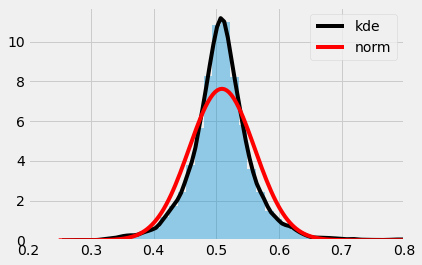

In [52]:
predictions = np.zeros(test.shape[0])
predictions = np.median(np.mean([model(test, training = False).numpy() for model in models],axis=0),axis=1)
#predictions = models(test, training = False).numpy()[:,0]



sns.distplot(predictions,
             kde_kws={'label': 'kde','color':'k'},
             fit=norm,
             fit_kws={'label': 'norm','color':'red'},
             rug=False
            )

plt.legend()
plt.xlim(0.2,0.8)
plt.show();

In [53]:
th = 0.500
pd.DataFrame(np.where(predictions >= opt_th, 1, 0).astype(int)).value_counts()

1    14891
0      328
dtype: int64

## Inference

In [54]:
# Inference
models = models[0]

if Inf:

    env = janestreet.make_env()

    for (test_df, pred_df) in tqdm(env.iter_test()):
        
        if test_df['weight'].item() > 0:
            x_tt = test_df.loc[:, features].values
        
            if np.isnan(x_tt[:, 1:].sum()):
                x_tt[:, 1:] = np.nan_to_num(x_tt[:, 1:]) + np.isnan(x_tt[:, 1:]) * f_mean
        
            pred = np.median(np.mean([model(x_tt, training = False).numpy() for model in models],axis=0),axis=1)
            pred_df.action = np.where(pred >= opt_th, 1, 0).astype(int)
        
        env.predict(pred_df)
else:
    print('Traning Done')

Traning Done


In [55]:
if Inf:
    # display submission.csv
    submission = pd.read_csv('./submission.csv')
    print(submission.action.value_counts())

In [56]:
if Inf:
    sns.countplot(submission.action);